# Exercise: Tidying Data

When you do data analysis, 80% of your work will be devoted to data cleaning, while the remainaing 20% will done for modeling and statistical analysis, according to the **80-20 rule** or [**Pareto principle**](https://en.wikipedia.org/wiki/Pareto_principle). That is why, data wrangling is an important skill to learn.

After loading your data in R, the next thing that you will do is to tidy your data. Once you have tidy data, you will spend much less time transforming your data, allowing you to spend more time on analyzing your data.

When you finish this exercise, you will learn how to:
1. tidy your data 
2. use the tools in dplyr package
3. use the pipe operator %>%

## Tidy data

Before you start, you need to load packages in **tidyverse** to help you in tidying your data.

In [1]:
# Load tidyverse
library(tidyverse)

── Attaching packages ──────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this exercise, you will be using functions in the **tidyr** package to reshape your data.

In [2]:
# Read the documentation of tidyr package
help(package = "tidyr")

From the tidyr documentation, a **tidy data** is defined as:
1. each column is a variable
2. each row is an observation
3. each cell contains a single value

To illustrate, run the cell below to import a tidy version of the population data from [World Bank](https://datacatalog.worldbank.org/dataset/population-estimates-and-projections), ***`population_tidy.csv`***. Download this file from Google Classroom and save it in your current directory.

In [3]:
population_data <- read_csv("population_tidy.csv")


── Column specification ─────────────────────────────────────────────────────
cols(
  `Country Name` = col_character(),
  year = col_double(),
  population = col_double()
)




With the data in tidy format, it is easy to perform data analysis. For example, you want to compare the population trend of two countries: Japan and China, including the estimates up to 2050. First, you subset the data for the two countries.

In [8]:
population_data_sub  <- population_data %>% 
    filter(`Country Name` %in% c("China", "Japan")) %>%
    select(`Country Name`, year, population)
head(population_data_sub)

Country Name,year,population
<chr>,<dbl>,<dbl>
China,1960,667070000
China,1961,660330000
China,1962,665770000
China,1963,682335000
China,1964,698355000
China,1965,715185000


From this point, you can easily generate a plot to visualize the data. You learn about data visualization using ggplot in future exercise.

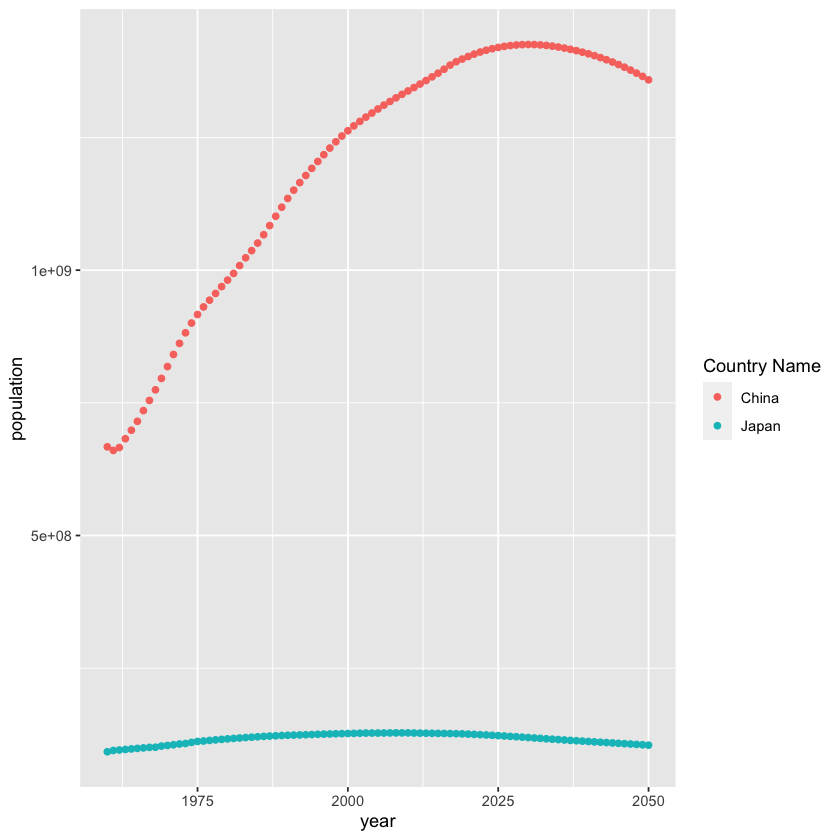

In [9]:
population_data_sub %>% 
    ggplot(aes(year, population, color = `Country Name`)) +
        geom_point()

The obvious reason why you can generate this figure with a few lines of code is that the data is already tidy, where each point is represented in a row. This satisfies the definition of tidy data, where each row represents one observation and each columns represents different variables for those observations.

When tidying a data, you will be needing tools from the **dplyr** package to help you in this process. The [dplyr cheatsheet](https://raw.githubusercontent.com/rstudio/cheatsheets/master/data-transformation.pdf) will be handy if you don't remember the functions in the this package.

In [10]:
# Read the documentation of dplyr package
help(package = "dplyr")

## Filter rows with `filter( )`

The **`filter( )`** function allows you to select a subset of rows in a data frame. The first argument is the tibble and the second and subsequent arguments refer to variables, selecting rows where the expression is `TRUE`.

For example, you can select the population data of your country from the object, `population_data`.

In [13]:
# Subset population data of your country
filter(population_data, `Country Name` == "Philippines")

Country Name,year,population
<chr>,<dbl>,<dbl>
Philippines,1960,26269734
Philippines,1961,27161047
Philippines,1962,28077339
Philippines,1963,29012625
Philippines,1964,29958688
Philippines,1965,30909988
Philippines,1966,31864182
Philippines,1967,32823968
Philippines,1968,33795194


## The `%in%` operator

The **`%in%`** operator is handy when you want to select every row where it is one of the values you specificied. Just like in the example above, you can use this operator to subset the two countries: Japan and China. 

In [14]:
# Subset data for Japan and China
filter(population_data, `Country Name` %in% c("Japan","China"))

Country Name,year,population
<chr>,<dbl>,<dbl>
China,1960,667070000
China,1961,660330000
China,1962,665770000
China,1963,682335000
China,1964,698355000
China,1965,715185000
China,1966,735400000
China,1967,754550000
China,1968,774510000


## Sort rows with `arrange( )`

The `arrange()` function acts on rows and reorders the values in increasing manner if the data is numeral and alphabetical if it is character. The first argument is a data frame followed by name or names of column to arrange. You can use the `desc( )` function if you want to sort in decreasing order.

In [15]:
# Sort the population column 
arrange(population_data, population)

Country Name,year,population
<chr>,<dbl>,<dbl>
St. Martin (French part),1960,3893
St. Martin (French part),1961,3989
St. Martin (French part),1962,4076
St. Martin (French part),1963,4183
St. Martin (French part),1964,4308
Nauru,1960,4375
St. Martin (French part),1965,4468
Nauru,1961,4632
St. Martin (French part),1966,4685


You can also reverse the alphabetical order of country names, then sort the population number in decreasing manner.

In [16]:
# Sort the names of the countries in reverse alphabetical order 
# and then by decreasing population number
arrange(population_data, desc(`Country Name`), desc(population))

Country Name,year,population
<chr>,<dbl>,<dbl>
Zimbabwe,2050,23948000
Zimbabwe,2049,23663000
Zimbabwe,2048,23372000
Zimbabwe,2047,23075000
Zimbabwe,2046,22772000
Zimbabwe,2045,22465000
Zimbabwe,2044,22152000
Zimbabwe,2043,21835000
Zimbabwe,2042,21514000


## Select rows based on position with `slice( )`

The **`slice()`** function allows you to index rows by their locations in the data frame. In R, the first observation has an index of 1, the second observation has an index of 2, and so on.

In [17]:
# Select the observations in rows 5 to 10 in the population data
slice(population_data, 5:10)

Country Name,year,population
<chr>,<dbl>,<dbl>
Afghanistan,1964,9744781
Afghanistan,1965,9956320
Afghanistan,1966,10174836
Afghanistan,1967,10399926
Afghanistan,1968,10637063
Afghanistan,1969,10893776


## Select columns with `select( )`

The `select( )` function is useful especially when you work with large datasets with many columns but only a few are actually needed to answer your question. You can select using column names or column numbers.

In [18]:
# Select using column names for "Country Name" and "population" columns
select(population_data, `Country Name`, population)

Country Name,population
<chr>,<dbl>
Afghanistan,8996973
Afghanistan,9169410
Afghanistan,9351441
Afghanistan,9543205
Afghanistan,9744781
Afghanistan,9956320
Afghanistan,10174836
Afghanistan,10399926
Afghanistan,10637063


In [19]:
# Select using column numbers for "Country Name" and "population" columns 
select(population_data, 1, 3)

Country Name,population
<chr>,<dbl>
Afghanistan,8996973
Afghanistan,9169410
Afghanistan,9351441
Afghanistan,9543205
Afghanistan,9744781
Afghanistan,9956320
Afghanistan,10174836
Afghanistan,10399926
Afghanistan,10637063


## Add new columns with `mutate( )`

If you want to create a new variable by computing the log values of the number of population, then you can use the `mutate( )` function.

In [20]:
# Calculate the log of the population number and assign with column name: log_population
mutate(population_data, log_population = log10(population))

Country Name,year,population,log_population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1960,8996973,6.954096
Afghanistan,1961,9169410,6.962341
Afghanistan,1962,9351441,6.970879
Afghanistan,1963,9543205,6.979694
Afghanistan,1964,9744781,6.988772
Afghanistan,1965,9956320,6.998099
Afghanistan,1966,10174836,7.007527
Afghanistan,1967,10399926,7.017030
Afghanistan,1968,10637063,7.026822


## Change column order with `relocate( )`

You use the `relocate( )` function if want to change the order of the columns.

In [21]:
# Reorder the columns as year, country, population
relocate(population_data, year, `Country Name`, population)

year,Country Name,population
<dbl>,<chr>,<dbl>
1960,Afghanistan,8996973
1961,Afghanistan,9169410
1962,Afghanistan,9351441
1963,Afghanistan,9543205
1964,Afghanistan,9744781
1965,Afghanistan,9956320
1966,Afghanistan,10174836
1967,Afghanistan,10399926
1968,Afghanistan,10637063


## Summarize the values with `summarize( )`

The `summarize( )` function collapses a series of values to a single value. This is useful if you want to calculate the mean, median, standard deviation, etc. It usually comes together with the helper function `group_by( )`. For example, if you want to extract the highest population number in each each country: 

In [24]:
# Group the data according to country name
country_group  <- group_by(population_data, `Country Name`)
# Determine the max value of population for each country
summarize(country_group, max(population))

`summarise()` ungrouping output (override with `.groups` argument)



Country Name,max(population)
<chr>,<dbl>
Afghanistan,64683000
Albania,3286542
Algeria,60923000
American Samoa,59681
Andorra,84463
Angola,77420000
Antigua and Barbuda,111000
Argentina,54973000
Armenia,3538171


## Combining functions with the pipe operator `%>%`

The pipe operator **`%>%`** operator allows you to write multiple nested functions that you can read left-to-right or top-to-bottom.
With the use of pipe operator **`%>%`**, there is no need to repeat encoding the name of the object since whatever is being piped, R assumed that it is what should be operated on the next task.

In [25]:
# Rewrite the code above to group the countries then for each country get the max value using the pipe operator
population_data %>% 
    group_by(`Country Name`) %>%
    summarize(max_population = max(population))

`summarise()` ungrouping output (override with `.groups` argument)



Country Name,max_population
<chr>,<dbl>
Afghanistan,64683000
Albania,3286542
Algeria,60923000
American Samoa,59681
Andorra,84463
Angola,77420000
Antigua and Barbuda,111000
Argentina,54973000
Armenia,3538171


## Tidying messy datasets

Most real-life datasets usually violate the definition of tidy data. Occasionally, you do get a dataset that you can start analyzing immediately. However, this is the exception, and not the rule. And unless, of course, when you are the boss and you have minions who can do the data cleaning for you. 

## Column headers are values, not variable names

A common type of untidy dataset is tabular data designed for presentation, where variables form both the rows and columns, and column headers are values, not variable names. An example is the population dataset from <a href="https://datacatalog.worldbank.org/dataset/population-estimates-and-projections">World Bank</a>. Load the untidy population data that you saved in the previous exercise, ***`population.csv`***. Make sure that this file is in your current directory.

In [26]:
# Load the messy population data
population_untidy  <- read_csv("population.csv")
head(population_untidy)


── Column specification ─────────────────────────────────────────────────────
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character()
)
ℹ Use `spec()` for the full column specifications.




Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,⋯,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,88.061110,89.489513,90.782451,91.898948,92.728007,93.20129,⋯,54.24420,54.35639,54.50230,54.67723,54.87497,55.10340,55.33340,55.56407,55.79133,56.01209
Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.591951,6.700903,6.793279,6.867327,6.919224,6.94779,⋯,12.97508,13.34756,13.73495,14.13512,14.54704,14.94902,15.35219,15.75909,16.17218,16.59309
Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.324186,82.626198,83.789155,84.767354,85.474209,85.87297,⋯,40.75487,40.53981,40.34314,40.16073,39.98564,39.84367,39.69765,39.54471,39.37918,39.19644
Arab World,ARB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,"Age population, age 01, female, interpolated",SP.POP.AG01.FE.IN,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


There are several problems with the current format of the data:

1. The column headers, "1961", "1962", ... etc represent values of the year variable, and the values in these columns represent the numbers of the population estimate or some statistics. This data is an example of a wide table format, where each row represents several data points, violating the definition of a tidy data. To tidy it, you need to pivot the non-variable columns into a two-column key-value pair using the `pivot_longer( )` function. This action is often described as making a wide dataset longer

2. The first few rows are not country names, but regions, which must be deleted. 

3. The columns "Country Code", "Indicator Name", "Indicator Code" are not needed in the analysis to answer the question.

Just like solving any big problems in life, you can tackle it by breaking it down into smaller pieces that you can actually solve.


First, since the objective here is to extract the number of population in each country, we are interested here the value, "Population, total" under the column, "Indicator Name". Subset only these rows using the **`filter( )`** function.

In [27]:
population_untidy %>% 
        filter(`Indicator Name` == "Population, total")

Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,⋯,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arab World,ARB,"Population, total",SP.POP.TOTL,92197753,94724510,97334442,100034179,102832760,105736431,⋯,603912000,611544000,619141000,626692000,634193000,641628000,649001000,656300000,663517000,670640000
Caribbean small states,CSS,"Population, total",SP.POP.TOTL,4194713,4274061,4353625,4432219,4508192,4580372,⋯,7852000,7851000,7845000,7840000,7833000,7823000,7809000,7798000,7782000,7765000
Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,91401764,92232738,93009498,93840016,94715795,95440988,⋯,93131000,92644000,92165000,91691000,91222000,90758000,90293000,89831000,89365000,88881000
Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,980003388,1003194951,1027204720,1051972898,1077531290,1103859980,⋯,4067847000,4094294000,4119906000,4144683000,4168625000,4191718000,4213975000,4235377000,4255920000,4275599000
East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1040958103,1044544622,1059018809,1084796352,1110214377,1136691455,⋯,2453683000,2452420000,2450649000,2448353000,2445516000,2442127000,2438197000,2433731000,2428760000,2423067000
East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,894875726,894479483,906413883,929634713,952494250,976360592,⋯,2216848000,2216443000,2215556000,2214161000,2212246000,2209798000,2206826000,2203339000,2199369000,2194737000
East Asia & Pacific (IDA & IBRD countries),TEA,"Population, total",SP.POP.TOTL,883445573,882807967,894536179,917563055,940205368,963806254,⋯,2189981000,2189595000,2188730000,2187362000,2185476000,2183060000,2180123000,2176672000,2172742000,2168152000
Euro area,EMU,"Population, total",SP.POP.TOTL,265203934,267621101,270110056,272655378,275163387,277650957,⋯,335042000,334299000,333504000,332661000,331768000,330829000,329853000,328838000,327794000,326687000
Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,666753314,674450648,682397793,690411689,698355562,706070485,⋯,928997000,928495000,927921000,927271000,926546000,925750000,924881000,923940000,922919000,921729000


Second, the first few rows are not countries but data for regions, these rows can be deleted by slicing.

In [28]:
population_untidy %>% 
        filter(`Indicator Name` == "Population, total") %>%                 
        slice(43:nrow(population_untidy))

Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,⋯,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973,9169410,9351441,9543205,9744781,9956320,⋯,57748000,58574000,59387000,60188000,60974000,61746000,62503000,63245000,63972000,64683000
Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,⋯,2583000,2562000,2542000,2520000,2499000,2477000,2456000,2434000,2412000,2390000
Algeria,DZA,"Population, total",SP.POP.TOTL,11057863,11336339,11619828,11912803,12221675,12550885,⋯,56174000,56711000,57250000,57789000,58326000,58859000,59388000,59911000,60423000,60923000
American Samoa,ASM,"Population, total",SP.POP.TOTL,20123,20602,21253,22034,22854,23672,⋯,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000
Andorra,AND,"Population, total",SP.POP.TOTL,13411,14375,15370,16412,17469,18549,⋯,78000,78000,78000,77000,77000,77000,77000,77000,76000,76000
Angola,AGO,"Population, total",SP.POP.TOTL,5454933,5531472,5608539,5679458,5735044,5770570,⋯,61432000,63110000,64814000,66544000,68298000,70075000,71877000,73701000,75549000,77420000
Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,54131,55001,55841,56702,57641,58698,⋯,109000,110000,110000,110000,110000,110000,111000,111000,111000,111000
Argentina,ARG,"Population, total",SP.POP.TOTL,20481779,20817266,21153052,21488912,21824425,22159650,⋯,52693000,52973000,53245000,53512000,53772000,54026000,54273000,54514000,54748000,54973000
Armenia,ARM,"Population, total",SP.POP.TOTL,1874121,1941492,2009526,2077578,2145001,2211319,⋯,2897000,2890000,2882000,2873000,2865000,2856000,2846000,2837000,2827000,2816000


Third, the other columns such as "Country Code", "Indicator Name", and "Indicator Code" are not needed. Use the `select( )` function together with the not **`!`** operator to drop these columns. 

In [29]:
population_untidy %>% 
        filter(`Indicator Name` == "Population, total") %>%                 
        slice(43:nrow(population_untidy)) %>%                               
        select(!c(`Country Code`, `Indicator Name`, `Indicator Code`))

Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,⋯,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,8996973,9169410,9351441,9543205,9744781,9956320,10174836,10399926,10637063,⋯,57748000,58574000,59387000,60188000,60974000,61746000,62503000,63245000,63972000,64683000
Albania,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,⋯,2583000,2562000,2542000,2520000,2499000,2477000,2456000,2434000,2412000,2390000
Algeria,11057863,11336339,11619828,11912803,12221675,12550885,12902627,13275026,13663583,⋯,56174000,56711000,57250000,57789000,58326000,58859000,59388000,59911000,60423000,60923000
American Samoa,20123,20602,21253,22034,22854,23672,24462,25248,25989,⋯,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000
Andorra,13411,14375,15370,16412,17469,18549,19647,20758,21890,⋯,78000,78000,78000,77000,77000,77000,77000,77000,76000,76000
Angola,5454933,5531472,5608539,5679458,5735044,5770570,5781214,5774243,5771652,⋯,61432000,63110000,64814000,66544000,68298000,70075000,71877000,73701000,75549000,77420000
Antigua and Barbuda,54131,55001,55841,56702,57641,58698,59915,61241,62521,⋯,109000,110000,110000,110000,110000,110000,111000,111000,111000,111000
Argentina,20481779,20817266,21153052,21488912,21824425,22159650,22494035,22828869,23168267,⋯,52693000,52973000,53245000,53512000,53772000,54026000,54273000,54514000,54748000,54973000
Armenia,1874121,1941492,2009526,2077578,2145001,2211319,2276034,2339127,2401143,⋯,2897000,2890000,2882000,2873000,2865000,2856000,2846000,2837000,2827000,2816000


Finally, reshape the wide data to make it taller using the `pivot_longer( )` function. You just solved the smaller problems one-at-a-time in separate code blocks. Now, you will combine them all in just one code block using a series of pipes `%>%` to make your data tidy and assign it to a new object: `population_tidy`. 


In [30]:
# Reshape the population dataset into tidy format
population_tidy  <- population_untidy %>% 
        filter(`Indicator Name` == "Population, total") %>%                 # Subset rows containing total population data
        slice(43:nrow(population_untidy)) %>%                               # Remove rows not needed
        select(!c(`Country Code`, `Indicator Name`, `Indicator Code`)) %>%  # Drop columns not needed
        pivot_longer(cols = -1,                                             # Reshape wide data to make longer
                     names_to = "year", 
                     values_to = "population")
population_tidy

Country Name,year,population
<chr>,<chr>,<dbl>
Afghanistan,1960,8996973
Afghanistan,1961,9169410
Afghanistan,1962,9351441
Afghanistan,1963,9543205
Afghanistan,1964,9744781
Afghanistan,1965,9956320
Afghanistan,1966,10174836
Afghanistan,1967,10399926
Afghanistan,1968,10637063


In the remaining exercise, you are going to answer how is the COVID-19 situation in your country. By analyzing the total number of cases over time, you can see how the pandemic is expanding in your country. You can include in your analysis data from other countries for comparison. To answer this question, you will import the "***time_series_covid19_confirmed_global.csv***" file from the <a href="https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series">Github site</a> of Johns Hopkins University. If you do not have internet connection, you may import the file that you worked with from the previous exercise. Your goal in this exercise is to reshape this data into tidy format.

In [33]:
# Import COVID-19 data
link  <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_covid  <- read_csv(link)


── Column specification ─────────────────────────────────────────────────────
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [34]:
# Check the dimension of the data
print(dim(confirmed_covid))

[1] 272 360


In [35]:
# Check the top and bottom rows of the data 
head(confirmed_covid)
tail(confirmed_covid)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,⋯,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538
NA,Albania,41.15330,20.16830,0,0,0,0,0,0,⋯,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971
NA,Algeria,28.03390,1.65960,0,0,0,0,0,0,⋯,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369
NA,Andorra,42.50630,1.52180,0,0,0,0,0,0,⋯,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586
NA,Angola,-11.20270,17.87390,0,0,0,0,0,0,⋯,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254
NA,Antigua and Barbuda,17.06080,-61.79640,0,0,0,0,0,0,⋯,159,160,160,160,163,163,167,169,176,176


Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Venezuela,6.42380,-66.58970,0,0,0,0,0,0,⋯,114083,114230,114407,114662,114908,115322,115667,116172,116610,116983
NA,Vietnam,14.05832,108.27720,0,2,2,2,2,2,⋯,1482,1494,1497,1504,1505,1509,1512,1513,1514,1515
NA,West Bank and Gaza,31.95220,35.23320,0,0,0,0,0,0,⋯,140287,141219,142228,143169,144257,145252,146074,146701,147400,148171
NA,Yemen,15.55273,48.51639,0,0,0,0,0,0,⋯,2101,2101,2101,2101,2102,2104,2104,2104,2104,2105
NA,Zambia,-13.13390,27.84933,0,0,0,0,0,0,⋯,21230,21582,21993,22645,23495,24297,25326,26567,27728,28596
NA,Zimbabwe,-19.01544,29.15486,0,0,0,0,0,0,⋯,14491,15265,15829,17194,17804,18675,19660,20499,21477,22297


There are several problems with the current format of the data: 
1. Similar to the population data, a common problem of real-life data is that column names are not usually the names of variables, but are themselves values of a variable, which is true for columns that are dates e.g. "1/22/20", "1/23/20", etc. in this dataset.
2. You might have noticed from the previous exercise that some countries reported confirmed COVID-19 cases at the provincial or state level, while others at the country level. This requires collapsing rows by adding the reported cases for countries with data in "Province/State" column.
3. The columns 'Lat' and 'Long' are not needed in the analysis to answer the question. 

Just like solving any big problems in life, you can tackle it by breaking it down into smaller pieces that you can actually solve.

Drop the "Lat" and "Long" columns using `select( )` since they are not need in the analysis. Recall the not operator `!`, this will be handy here.

In [36]:
confirmed_covid %>% 
    select(!c(Lat, Long))

Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,⋯,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,0,0,0,0,0,0,0,0,⋯,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538
NA,Albania,0,0,0,0,0,0,0,0,⋯,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971
NA,Algeria,0,0,0,0,0,0,0,0,⋯,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369
NA,Andorra,0,0,0,0,0,0,0,0,⋯,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586
NA,Angola,0,0,0,0,0,0,0,0,⋯,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254
NA,Antigua and Barbuda,0,0,0,0,0,0,0,0,⋯,159,160,160,160,163,163,167,169,176,176
NA,Argentina,0,0,0,0,0,0,0,0,⋯,1634834,1640718,1648940,1662730,1676171,1690006,1703352,1714409,1722217,1730921
NA,Armenia,0,0,0,0,0,0,0,0,⋯,159798,160027,160220,160544,160853,161054,161415,161794,162131,162288
Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,⋯,118,118,118,118,118,118,118,118,118,118


In the cell below, you will collapse multiple entries of countries that reported COVID-19 cases at the provincial/state level and aggregate the counts by taking the sum. Here, you will use the **`group_by( )`** and **`summarize( )`** functions, respectively.  

In [37]:
confirmed_covid %>%
  group_by(`Country/Region`) %>%
  summarize_if(is.numeric, sum)

Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,⋯,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,⋯,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538
Albania,41.15330,20.168300,0,0,0,0,0,0,0,⋯,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,⋯,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,⋯,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,⋯,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,⋯,159,160,160,160,163,163,167,169,176,176
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,⋯,1634834,1640718,1648940,1662730,1676171,1690006,1703352,1714409,1722217,1730921
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,⋯,159798,160027,160220,160544,160853,161054,161415,161794,162131,162288
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,⋯,28484,28504,28517,28536,28546,28571,28582,28595,28614,28634


In [38]:
confirmed_covid %>%
    pivot_longer(cols = c(`1/22/20`:ncol(confirmed_covid)),
               names_to = "date",
               values_to = "cases")

Province/State,Country/Region,Lat,Long,date,cases
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
NA,Afghanistan,33.93911,67.70995,1/22/20,0
NA,Afghanistan,33.93911,67.70995,1/23/20,0
NA,Afghanistan,33.93911,67.70995,1/24/20,0
NA,Afghanistan,33.93911,67.70995,1/25/20,0
NA,Afghanistan,33.93911,67.70995,1/26/20,0
NA,Afghanistan,33.93911,67.70995,1/27/20,0
NA,Afghanistan,33.93911,67.70995,1/28/20,0
NA,Afghanistan,33.93911,67.70995,1/29/20,0
NA,Afghanistan,33.93911,67.70995,1/30/20,0


You just solved the 3 smaller problems one-at-a-time in 3 code blocks. Now, you will combine all 3 in just one code block using a series of pipes `%>%` to make your data tidy and assign it to a new object: `confirmed_covid_tidy`.

In [39]:
confirmed_covid_tidy  <- confirmed_covid %>% 
    select(!c(Lat, Long)) %>% 
    group_by(`Country/Region`) %>%
    summarize_if(is.numeric, sum) %>% 
    pivot_longer(cols = -1, 
                 names_to = "date", 
                 values_to = "cases")
confirmed_covid_tidy

Country/Region,date,cases
<chr>,<chr>,<dbl>
Afghanistan,1/22/20,0
Afghanistan,1/23/20,0
Afghanistan,1/24/20,0
Afghanistan,1/25/20,0
Afghanistan,1/26/20,0
Afghanistan,1/27/20,0
Afghanistan,1/28/20,0
Afghanistan,1/29/20,0
Afghanistan,1/30/20,0


Congratulations! You have reshaped your data into tidy format.

Now that your data in tidy, you can answer the question by plotting the cumulative number of COVID-19 cases since the beginning of the pandemic. Modify the code below to add your country. Feel free to add up to a maximum of 5 countries in the plot to prevent cluttering the figure. 

In [ ]:
install.packages("lubridate")
library(lubridate) 
confirmed_covid_tidy  %>% 
    mutate(date = mdy(date)) %>% 
    filter(`Country/Region` %in% c("China", "Japan", "Philippines")) %>% 
    ggplot(aes(date, cases, color = `Country/Region`)) +
    geom_line()

In [ ]:
# How is COVID-19 expanding in your country? 
# Ans:

## Saving your data

Before finishing this exercise, save the confirmed COVID-19 and population datasets in tidy format in either csv or RDS format. Make sure to use filenames that can distinguish between messy and tidy data.

In [ ]:
# Save the tidy data on population
write_csv(population_tidy,
         file = "population_tidy.csv")

In [ ]:
# Save the tidy data on confirmed COVID-19 cases
write_csv(confirmed_covid_tidy,
         file = "confirmed_covid_tidy.csv")